In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

sns.set(style="white", context="talk")
# 读取数据
starbucks = pd.read_csv("H:\\notebooks\\datasets\\directory.csv")


### Read first few rows

In [2]:
starbucks.head(5)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


### Read last few rows

In [3]:
starbucks.tail(5)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79
25599,Starbucks,47609-253286,Mall of Africa,Licensed,"Shop 2077, Upper Level, Waterfall City",Midrand,GT,ZA,1682,27873500215,GMT+000000 Africa/Johannesburg,28.11,-26.02


### Dataset dimensions

In [4]:
starbucks.shape

(25600, 13)

In [36]:
starbucks.index

RangeIndex(start=0, stop=25600, step=1)

In [37]:
starbucks.columns

Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')

In [62]:
starbucks.values

array([['Starbucks', '47370-257954', 'Meritxell, 96', ...,
        'GMT+1:00 Europe/Andorra', 1.53, 42.51],
       ['Starbucks', '22331-212325', 'Ajman Drive Thru', ...,
        'GMT+04:00 Asia/Dubai', 55.47, 25.42],
       ['Starbucks', '47089-256771', 'Dana Mall', ...,
        'GMT+04:00 Asia/Dubai', 55.47, 25.39],
       ..., 
       ['Starbucks', '47608-253804', 'Rosebank Mall', ...,
        'GMT+000000 Africa/Johannesburg', 28.04, -26.15],
       ['Starbucks', '47640-253809', 'Menlyn Maine', ...,
        'GMT+000000 Africa/Johannesburg', 28.28, -25.79],
       ['Starbucks', '47609-253286', 'Mall of Africa', ...,
        'GMT+000000 Africa/Johannesburg', 28.11, -26.02]], dtype=object)

In [61]:
starbucks.iloc[0:3,0:8]

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE


### Number of Records having complete data for each column

In [66]:
starbucks.notnull().sum()

Brand             25600
Store Number      25600
Store Name        25600
Ownership Type    25600
Street Address    25598
City              25585
State/Province    25600
Country           25600
Postcode          24078
Phone Number      18739
Timezone          25600
Longitude         25599
Latitude          25599
dtype: int64

### Completeness Percentage

In [67]:
starbucks.notnull().sum() * 100/starbucks.shape[0]

Brand             100.000000
Store Number      100.000000
Store Name        100.000000
Ownership Type    100.000000
Street Address     99.992188
City               99.941406
State/Province    100.000000
Country           100.000000
Postcode           94.054688
Phone Number       73.199219
Timezone          100.000000
Longitude          99.996094
Latitude           99.996094
dtype: float64

### How many stores are operating around the world?

In [68]:
starbucks.shape[0]

25600

### How many countries have stores around the world?

In [69]:
len(starbucks.Country.unique())  # unique 去重

73

### Which Country has the maximum number of Stores?

In [12]:
starbucks.Country.value_counts().head(1)    #value_counts 分组计数并排序

US    13608
Name: Country, dtype: int64

### Top 10 Countries with most number of stores

In [10]:
starbucks.Country.value_counts().head(10)

US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

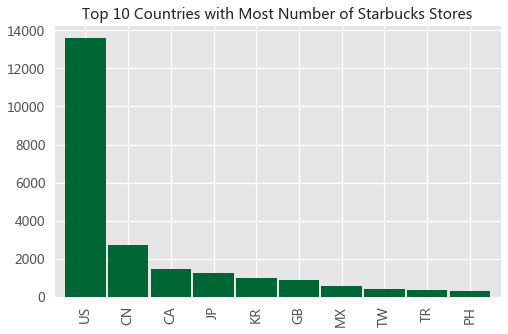

In [70]:
%matplotlib inline
plt.style.use("ggplot")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top 10 Countries with Most Number of Starbucks Stores")
starbucks.Country.value_counts().head(10).plot(kind="bar", width = 0.95,color = '#006633')

### Which city has the maximum number of stores?

In [71]:
starbucks.City.value_counts().head(1)

上海市    542
Name: City, dtype: int64

## Top 10 Cities with most number of stores?

In [72]:
starbucks.City.value_counts().head(10)

上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Mexico City    180
Chicago        180
Seattle        156
Las Vegas      156
Name: City, dtype: int64

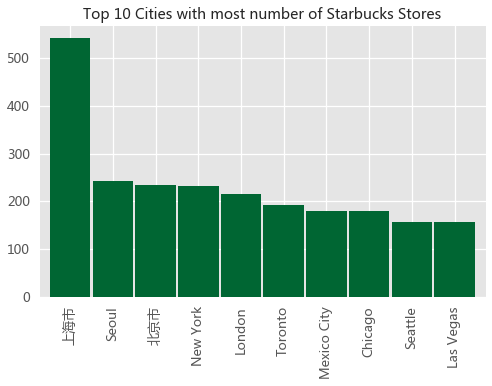

In [74]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top 10 Cities with most number of Starbucks Stores")
p = starbucks.City.value_counts().head(10).plot(kind="bar",width=0.95,color='#006633')
plt.show()

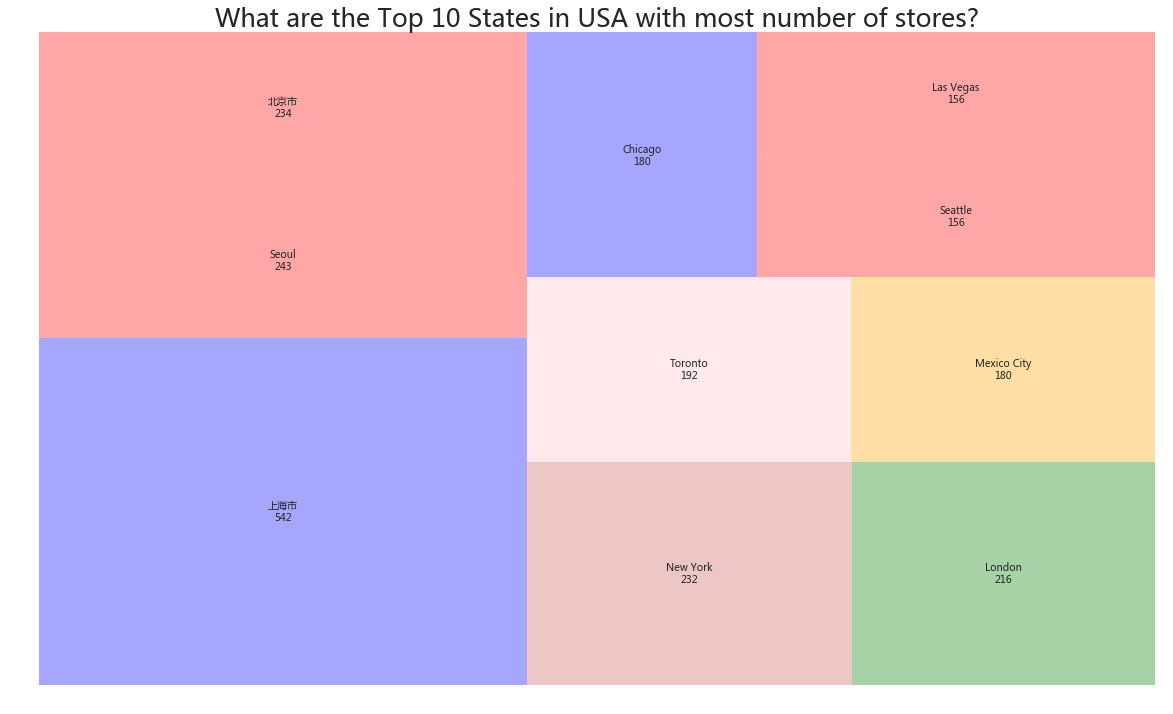

In [267]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
colors = ['b','r','red','indianred', 'green','pink','orange']
ax.set(title = "Top 10 Cities with most number of Starbucks Stores")
# p = starbucks.City.value_counts().head(10).plot(kind="bar",width=0.95,color='#006633')
p1 = starbucks.City.value_counts().head(10)

plot = squarify.plot(sizes = p1, # 指定绘图数据
                     label = p1.index, # 指定标签
                     color = colors, # 指定自定义颜色
                     alpha = 0.35, # 指定透明度
                     value = p1, # 添加数值标签
                     edgecolor = 'white', # 设置边界框为白色
                     linewidth =0.1, # 设置边框宽度为3
                    )
# 设置标签大小
plt.rc('font', size=140)
# 设置标题大小
plot.set_title('What are the Top 10 States in USA with most number of stores?',
               #fontsize = 40,
               fontdict = {'fontsize':25}
              )
# 去除坐标轴
plt.axis('off')
# 去除上边框和右边框刻度
plt.tick_params(top = 'off', right = 'off')
# 显示图形
plt.show()




plt.show()

### Who owns the stores?

In [75]:
starbucks['Ownership Type'].value_counts()

Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

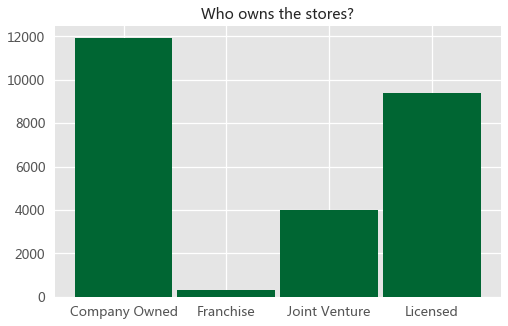

In [108]:
%matplotlib inline
plt.style.use("ggplot")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Who owns the stores?")

s = starbucks['Ownership Type'].value_counts()
ax.bar(s.index,s,width = 0.95,color = "#006633")
plt.show()


### Which State in USA has the most number of Starbucks stores?

In [109]:
usa_states = starbucks[starbucks['Country'] == 'US']
usa_states['State/Province'].value_counts().head(1)

CA    2821
Name: State/Province, dtype: int64

### What are the Top 10 States in USA based on number of stores?

In [32]:
usa_states['State/Province'].value_counts().head(10)

CA    2821
TX    1042
WA     757
FL     694
NY     645
IL     575
AZ     488
CO     481
VA     432
OH     378
Name: State/Province, dtype: int64

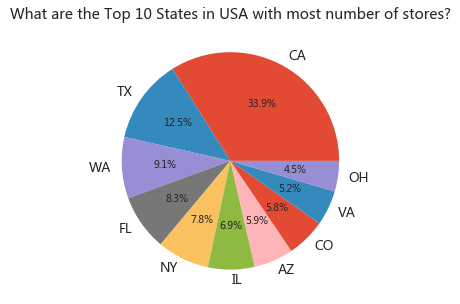

In [125]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title="What are the Top 10 States in USA with most number of stores?")
# pandas
usa_s = usa_states['State/Province'].value_counts().head(10)
# matplotlib
fdata=usa_s/usa_s.sum()
ax.axis('equal')
ax.pie(fdata,labels = usa_s.index,autopct='%1.1f%%')
plt.show()

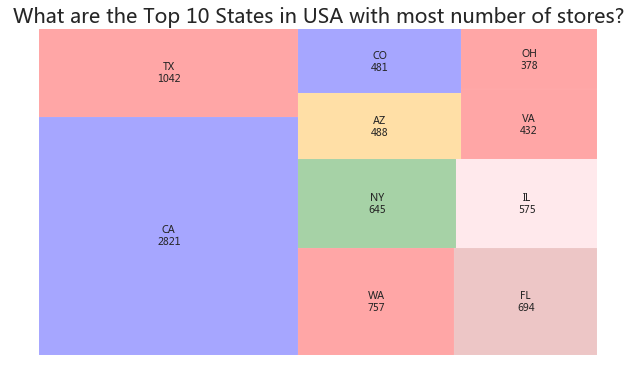

In [254]:
# 导入第三方包
%matplotlib inline
import matplotlib.pyplot as plt
import squarify

# r style
plt.style.use("ggplot")
#中文及负号处理办法
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 创建数据
name = usa_s = usa_states['State/Province'].value_counts().head(10).index
usa_s = usa_states['State/Province'].value_counts().head(10)

        
# 绘图
colors = ['b','r','red','indianred', 'green','pink','orange']
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
plot = squarify.plot(sizes = usa_s, # 指定绘图数据
                     label = name, # 指定标签
                     color = colors, # 指定自定义颜色
                     alpha = 0.35, # 指定透明度
                     value = usa_s, # 添加数值标签
                     edgecolor = 'white', # 设置边界框为白色
                     linewidth =0.1 # 设置边框宽度为3
                    )
# 设置标签大小
plt.rc('font', size=14)
# 设置标题大小
plot.set_title('What are the Top 10 States in USA with most number of stores?',
               fontsize = 20,
               #fontdict = {'fontsize':15}
              )
# 去除坐标轴
plt.axis('off')
# 去除上边框和右边框刻度
plt.tick_params(top = 'off', right = 'off')
# 显示图形
plt.show()


### Brands under which Starbucks Operates

In [34]:
starbucks.Brand.value_counts()

Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64

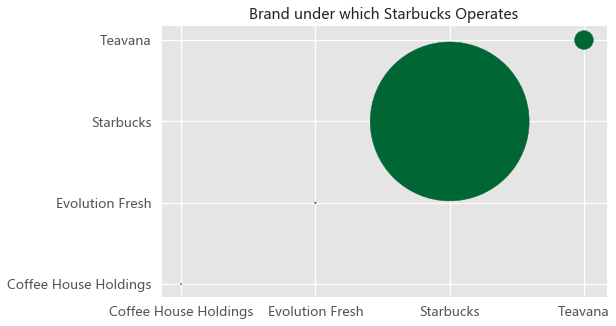

In [192]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title="Brand under which Starbucks Operates")
#starbucks.Brand.value_counts().plot(kind="bar", width = 0.95,color = "#006633")

x = starbucks.Brand.value_counts().index
y = starbucks.Brand.value_counts().index
s = starbucks.Brand.value_counts()
ax.scatter(x,y,s,marker ='o',color = "#006633")
# plt.show()

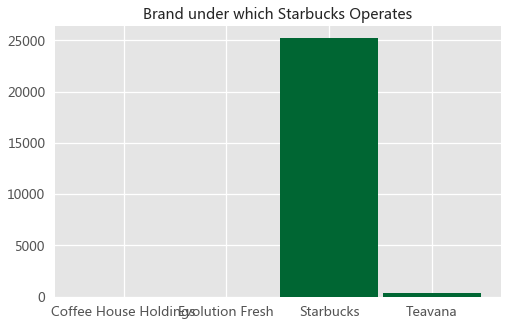

In [155]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title="Brand under which Starbucks Operates")
#starbucks.Brand.value_counts().plot(kind="bar", width = 0.95,color = "#006633")
values = starbucks.Brand.value_counts()
name = starbucks.Brand.value_counts().index
ax.bar(name,values, width = 0.95,color = "#006633")


plt.show()

### Mapping of the Stores World Wide

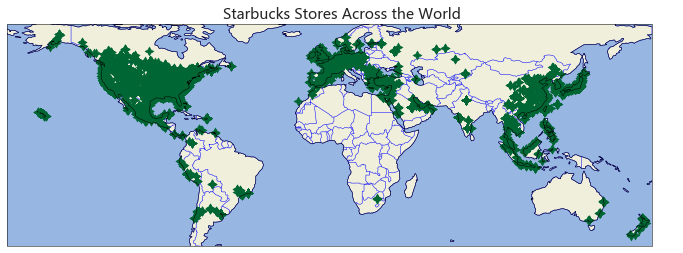

In [227]:
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
plt.style.use("ggplot")
#中文及负号处理办法
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()  # 绘制海岸线
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='b')
ax.add_feature(cfeature.BORDERS, zorder=0, edgecolor='b') 
# 分列操作
grade_split = pd.DataFrame((x.split('-') for x in starbucks['Store Number']),index=starbucks.index,columns=['min','max'])

ax.scatter(list(starbucks["Longitude"].astype(float)), 
           list(starbucks["Latitude"].astype(float)),
           #s=[1,2,1,6],
           #s = list(grade_split['max'].astype(float)[0:1]),
           #list(starbucks["Latitude"].astype(float)),# xdata,ydata
           
         color = '#006633', # 星巴克绿
        marker=(4, 1),
          transform= ccrs.PlateCarree()
         )
ax.set_title('Starbucks Stores Across the World')
plt.show()

### Mapping of Stores in USA

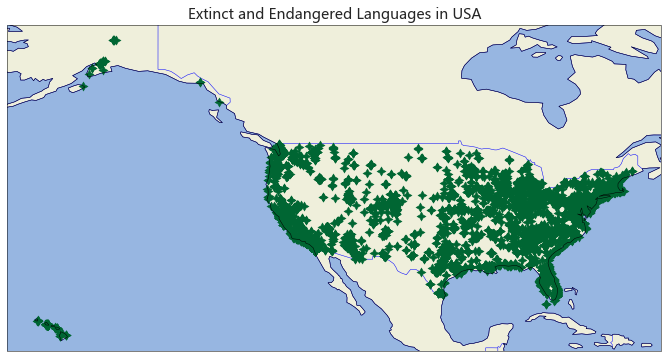

In [184]:
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
plt.style.use("ggplot")
#中文及负号处理办法
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()  # 绘制海岸线
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='b')
ax.add_feature(cfeature.BORDERS, zorder=0, edgecolor='b') #

stores  = usa_states['State/Province'].value_counts()
colors = np.sqrt(stores) 
plt.scatter(list(usa_states["Longitude"].astype(float)), list(usa_states["Latitude"].astype(float)), # xdata,ydata
         color = '#006633',
        marker=(4, 1),
         #s = stores,
          transform= ccrs.PlateCarree()
         )
plt.title('Extinct and Endangered Languages in USA')
plt.show()

### Mapping of Stores in China

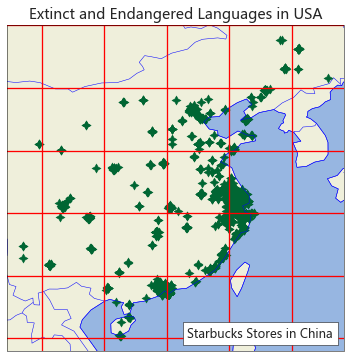

In [192]:
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
plt.style.use("ggplot")
#中文及负号处理办法
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='b')
ax.add_feature(cfeature.BORDERS, zorder=0, edgecolor='b') #

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
SOURCE = 'Natural Earth'
LICENSE = 'public domain'
ax.add_feature(states_provinces, edgecolor='b')

text = AnchoredText("Starbucks Stores in China",
                    loc=4, prop={'size': 12}, frameon=True)
ax.add_artist(text)


ax.coastlines(resolution='110m', color='b')  # 绘制海岸线
#ax.natural_earth_shp()
ax.gridlines(color="r")

china = starbucks[starbucks['Country'] == 'CN']
plt.scatter(list(china["Longitude"].astype(float)), list(china["Latitude"].astype(float)), # xdata,ydata
         color = '#006633',
         #s = stores,
          marker=(4, 1),
          transform= ccrs.PlateCarree()
         )
plt.title('Extinct and Endangered Languages in USA')
plt.show()